In [24]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from huggingface_hub import notebook_login
import torch
import pandas as pd
from transformers import pipeline
from sklearn.metrics import f1_score
import seaborn as sn
from matplotlib import pyplot as plt

In [2]:
notebook_login()

Login successful
Your token has been saved to C:\Users\researcher\.huggingface\token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [3]:
dataset = load_dataset("HFFErica/topicclassificaition", data_files={'train': 'train_filter.csv', 'test': 'test_filter.csv'})
dataset

Using custom data configuration HFFErica--topicclassificaition-5be74c8f0ede70b8


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\datasets\download\streaming_download_manager.py:697: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to C:/Users/researcher/.cache/huggingface/datasets/HFFErica___csv/HFFErica--topicclassificaition-5be74c8f0ede70b8/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


D:\Software\Anaconda3\envs\pytorch\lib\site-packages\datasets\download\streaming_download_manager.py:697: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['Order', 'text', 'final_topic', 'topics', 'label'],
        num_rows: 2169
    })
    test: Dataset({
        features: ['Order', 'text', 'final_topic', 'topics', 'label'],
        num_rows: 919
    })
})

In [4]:
train_dataset = dataset['train']
test_dataset = dataset['test']

In [5]:
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-mnli')

In [6]:
num_labels = len(set(train_dataset['label']))
model = AutoModelForSequenceClassification.from_pretrained('facebook/bart-large-mnli', num_labels=num_labels, ignore_mismatched_sizes=True)

Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-large-mnli and are newly initialized because the shapes did not match:
- classification_head.out_proj.weight: found shape torch.Size([3, 1024]) in the checkpoint and torch.Size([53, 1024]) in the model instantiated
- classification_head.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([53]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
pipe = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")   

In [8]:
content = dataset['test'].to_pandas()
content

,Order,text,final_topic,topics,label
0,257,it is honestly weird to me that a game from a ...,Accessibility options_1,Accessibility options,1
1,657,but no option/support/inclusion of subtitles a...,Accessibility options_1,Accessibility options,1
2,761,"Like most games, this one doesn't have left ha...",Accessibility options_1,Accessibility options,1
3,851,"in 21st centry, there's yet another game can't...",Accessibility options_1,Accessibility options,1
4,1144,how on earth can a game released in 2018 and s...,Accessibility options_1,Accessibility options,1
...,...,...,...,...,...
914,1613,the game is so outstanding and amazing with co...,VisualAtmosphere_5,VisualAtmosphere,61
915,1671,"The diverse and vibrant environments,",VisualAtmosphere_5,VisualAtmosphere,61
916,1679,"With the addition of photo mode stuff,",VisualAtmosphere_3,VisualAtmosphere,61
917,1694,if you do not already know it is a hospital si...,VisualAtmosphere_5,VisualAtmosphere,61


In [9]:
text=content['text']
text

0      it is honestly weird to me that a game from a ...
1      but no option/support/inclusion of subtitles a...
2      Like most games, this one doesn't have left ha...
3      in 21st centry, there's yet another game can't...
4      how on earth can a game released in 2018 and s...
                             ...                        
914    the game is so outstanding and amazing with co...
915                The diverse and vibrant environments,
916               With the addition of photo mode stuff,
917    if you do not already know it is a hospital si...
918    it follows the same art and animation, but thi...
Name: text, Length: 919, dtype: object

In [10]:
labels = [
"InteractionSocialisation",
"GameEvaluation",
"BugsCrashing",
"VisualAtmosphere",
"DifficultyBalance",
"Comparison",
"GameProgression",
"Exploration",
"Engaging",
"Update",
"ImmersionRealism",
"Novelty",
"Controls",
"Narrative",
"Developer",
"Audio",
"Platforms",
"Learnability",
"Combat mechanics",
"Management mechanics",
"Recommendation",
"Playtime and Gameplay length",
"Creative mechanics",
"Customisation",
"PersonalInfluence",
"Emotion",
"Development states",
"Guide and Tutorials",
"UIandUX",
"PriceQuality ratio",
"Players modification and Workshops",
"OnlineVideo",
"Movement mechanics",
"Survival mechanics",
"Virtual reality headset",
"In-game economic mechanics",
"Order state",
"Content filter",
"Mode settings",
"Navigation and Maps",
"Graphics settings",
"Review reception",
"Server",
"Promotion strategy and Marketing collateral",
"In-game physics mechanics",
"Social identity",
"Returning player",
"Accessibility options",
"Camera control",
"Puzzle mechanics",
"Refund",
"Game awareness duration",
"Language settings and Localisation"
]

In [11]:
results = pipe(text.to_list(), labels, multi_class=True)

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In [12]:
name=['labels','scores','sequence']
label_results=pd.DataFrame(columns=name,data=results)
print(label_results)
label_results.to_csv('zero-label_results_1125.csv',encoding='utf-8', index=False)

                                                labels  \
0    [Returning player, Language settings and Local...   
1    [Returning player, Game awareness duration, Pe...   
2    [Controls, Server, PersonalInfluence, Mode set...   
3    [Developer, Game awareness duration, PersonalI...   
4    [Update, Returning player, Game awareness dura...   
..                                                 ...   
914  [Engaging, Returning player, Graphics settings...   
915  [Engaging, Mode settings, VisualAtmosphere, Gr...   
916  [Mode settings, Camera control, Engaging, Upda...   
917  [Engaging, Returning player, Game awareness du...   
918  [Engaging, Graphics settings, Mode settings, D...   

                                                scores  \
0    [0.7739635705947876, 0.6822333931922913, 0.529...   
1    [0.9361804127693176, 0.8249107003211975, 0.774...   
2    [0.7566711902618408, 0.7225792407989502, 0.678...   
3    [0.362596720457077, 0.3358675539493561, 0.2717...   
4    [0.77533

In [13]:
content['zero_labels']=label_results['labels']
content

,Order,text,final_topic,topics,label,zero_labels
0,257,it is honestly weird to me that a game from a ...,Accessibility options_1,Accessibility options,1,"[Returning player, Language settings and Local..."
1,657,but no option/support/inclusion of subtitles a...,Accessibility options_1,Accessibility options,1,"[Returning player, Game awareness duration, Pe..."
2,761,"Like most games, this one doesn't have left ha...",Accessibility options_1,Accessibility options,1,"[Controls, Server, PersonalInfluence, Mode set..."
3,851,"in 21st centry, there's yet another game can't...",Accessibility options_1,Accessibility options,1,"[Developer, Game awareness duration, PersonalI..."
4,1144,how on earth can a game released in 2018 and s...,Accessibility options_1,Accessibility options,1,"[Update, Returning player, Game awareness dura..."
...,...,...,...,...,...,...
914,1613,the game is so outstanding and amazing with co...,VisualAtmosphere_5,VisualAtmosphere,61,"[Engaging, Returning player, Graphics settings..."
915,1671,"The diverse and vibrant environments,",VisualAtmosphere_5,VisualAtmosphere,61,"[Engaging, Mode settings, VisualAtmosphere, Gr..."
916,1679,"With the addition of photo mode stuff,",VisualAtmosphere_3,VisualAtmosphere,61,"[Mode settings, Camera control, Engaging, Upda..."
917,1694,if you do not already know it is a hospital si...,VisualAtmosphere_5,VisualAtmosphere,61,"[Engaging, Returning player, Game awareness du..."


In [14]:
content.to_csv('zero-label_results_1125.csv',encoding='utf-8', index=False)

In [18]:
rawdata = pd.read_csv('zero-label_results_1125.csv', encoding='utf-8')
rawdata

,Order,text,final_topic,topics,label,predicted_label
0,257,it is honestly weird to me that a game from a ...,Accessibility options_1,Accessibility options,1,Returning player
1,657,but no option/support/inclusion of subtitles a...,Accessibility options_1,Accessibility options,1,Returning player
2,761,"Like most games, this one doesn't have left ha...",Accessibility options_1,Accessibility options,1,Controls
3,851,"in 21st centry, there's yet another game can't...",Accessibility options_1,Accessibility options,1,Developer
4,1144,how on earth can a game released in 2018 and s...,Accessibility options_1,Accessibility options,1,Update
...,...,...,...,...,...,...
914,1613,the game is so outstanding and amazing with co...,VisualAtmosphere_5,VisualAtmosphere,61,Engaging
915,1671,"The diverse and vibrant environments,",VisualAtmosphere_5,VisualAtmosphere,61,Engaging
916,1679,"With the addition of photo mode stuff,",VisualAtmosphere_3,VisualAtmosphere,61,Mode settings
917,1694,if you do not already know it is a hospital si...,VisualAtmosphere_5,VisualAtmosphere,61,Engaging


In [19]:
rawdata[rawdata['topics'] != rawdata['predicted_label']]

,Order,text,final_topic,topics,label,predicted_label
0,257,it is honestly weird to me that a game from a ...,Accessibility options_1,Accessibility options,1,Returning player
1,657,but no option/support/inclusion of subtitles a...,Accessibility options_1,Accessibility options,1,Returning player
2,761,"Like most games, this one doesn't have left ha...",Accessibility options_1,Accessibility options,1,Controls
3,851,"in 21st centry, there's yet another game can't...",Accessibility options_1,Accessibility options,1,Developer
4,1144,how on earth can a game released in 2018 and s...,Accessibility options_1,Accessibility options,1,Update
...,...,...,...,...,...,...
914,1613,the game is so outstanding and amazing with co...,VisualAtmosphere_5,VisualAtmosphere,61,Engaging
915,1671,"The diverse and vibrant environments,",VisualAtmosphere_5,VisualAtmosphere,61,Engaging
916,1679,"With the addition of photo mode stuff,",VisualAtmosphere_3,VisualAtmosphere,61,Mode settings
917,1694,if you do not already know it is a hospital si...,VisualAtmosphere_5,VisualAtmosphere,61,Engaging


In [20]:
y_actu = rawdata['topics']
y_pred = rawdata['predicted_label']

In [21]:
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,Accessibility options,Audio,Camera control,Combat mechanics,Comparison,Controls,Creative mechanics,Customisation,Developer,Development states,...,Refund,Returning player,Review reception,Server,Social identity,Survival mechanics,UIandUX,Update,Virtual reality headset,All
Actual,,,,,,,,,,,,,,,,,,,,,
Accessibility options,0,0,0,0,0,1,0,0,1,0,...,0,2,0,0,0,0,0,1,0,6
Audio,0,9,0,0,0,0,0,1,0,0,...,0,2,0,0,0,0,0,0,0,24
BugsCrashing,0,0,0,0,3,1,0,0,5,0,...,0,14,0,4,0,0,0,0,0,48
Camera control,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
Combat mechanics,0,0,0,3,1,0,1,2,0,0,...,0,6,0,0,0,0,0,0,0,28
Comparison,0,0,0,1,6,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,24
Content filter,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Controls,0,0,0,0,0,5,0,0,2,0,...,0,1,0,0,0,0,0,1,1,14
Creative mechanics,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,10


In [22]:
df_confusion =df_confusion[:53]
df_confusion= df_confusion.drop('All', axis=1)
df_confusion

Predicted,Accessibility options,Audio,Camera control,Combat mechanics,Comparison,Controls,Creative mechanics,Customisation,Developer,Development states,...,Recommendation,Refund,Returning player,Review reception,Server,Social identity,Survival mechanics,UIandUX,Update,Virtual reality headset
Actual,,,,,,,,,,,,,,,,,,,,,
Accessibility options,0,0,0,0,0,1,0,0,1,0,...,0,0,2,0,0,0,0,0,1,0
Audio,0,9,0,0,0,0,0,1,0,0,...,0,0,2,0,0,0,0,0,0,0
BugsCrashing,0,0,0,0,3,1,0,0,5,0,...,2,0,14,0,4,0,0,0,0,0
Camera control,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Combat mechanics,0,0,0,3,1,0,1,2,0,0,...,0,0,6,0,0,0,0,0,0,0
Comparison,0,0,0,1,6,0,0,1,1,0,...,1,0,1,0,0,0,1,0,0,0
Content filter,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Controls,0,0,0,0,0,5,0,0,2,0,...,0,0,1,0,0,0,0,0,1,1
Creative mechanics,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [25]:
y_true = []
y_pred = []
for actual_class in df_confusion.index:
    for predicted_class in df_confusion.columns:
        count = df_confusion.loc[actual_class, predicted_class]
        y_true.extend([actual_class] * count)
        y_pred.extend([predicted_class] * count)

f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score (Macro):", f1)

F1 Score (Macro): 0.16495329159569871


In [26]:
f1 = f1_score(y_true, y_pred, average='micro')
print("F1 Score (Micro):", f1)

F1 Score (Micro): 0.1458106637649619


In [27]:
df_confusion.to_csv('zero_test_predict_replaced_confusion_nontrained.csv')

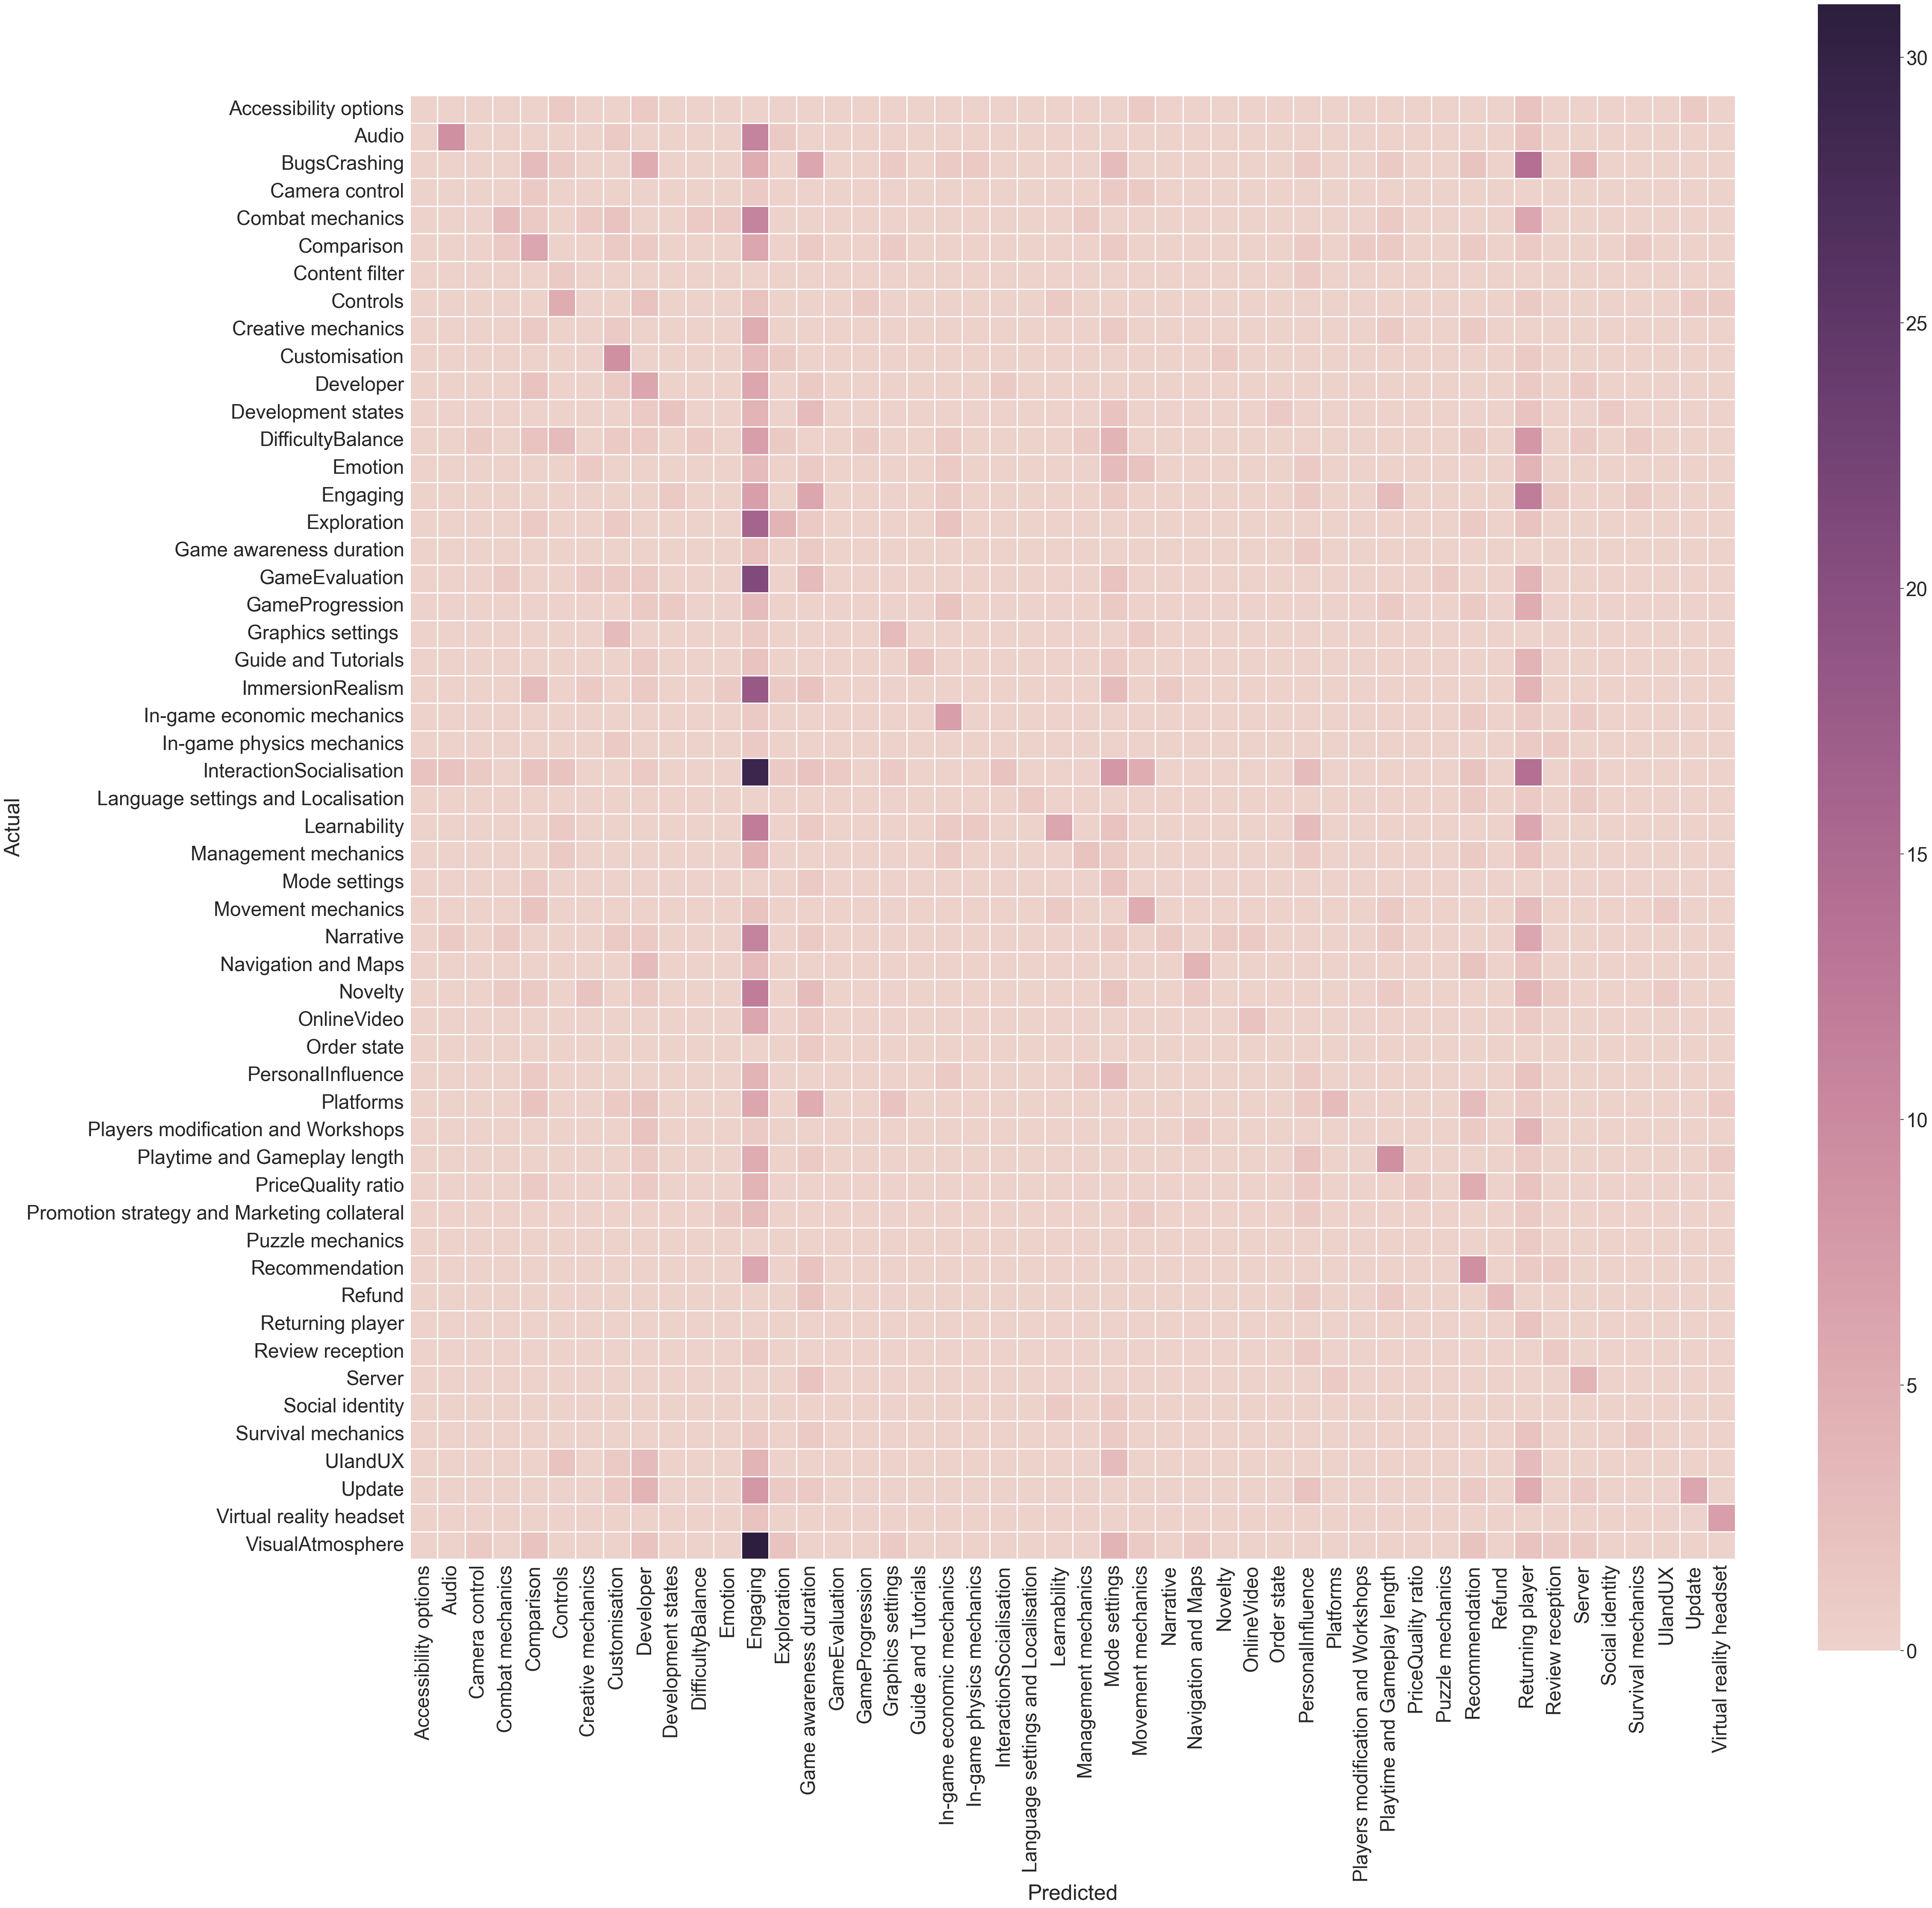

In [28]:
plt.figure(figsize = (50,50))

sn.set(font_scale=3) # for label size
sn.heatmap(df_confusion,  annot_kws={"size": 22}, cmap=sn.cubehelix_palette(as_cmap=True), fmt=".2f", square=True, linewidths=1, linecolor = "white")

plt.show()

In [29]:
from sklearn.preprocessing import minmax_scale
df_confusion[:] = minmax_scale(df_confusion)

C:\Users\researcher\AppData\Local\Temp\ipykernel_15800\1290073343.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_confusion[:] = minmax_scale(df_confusion)


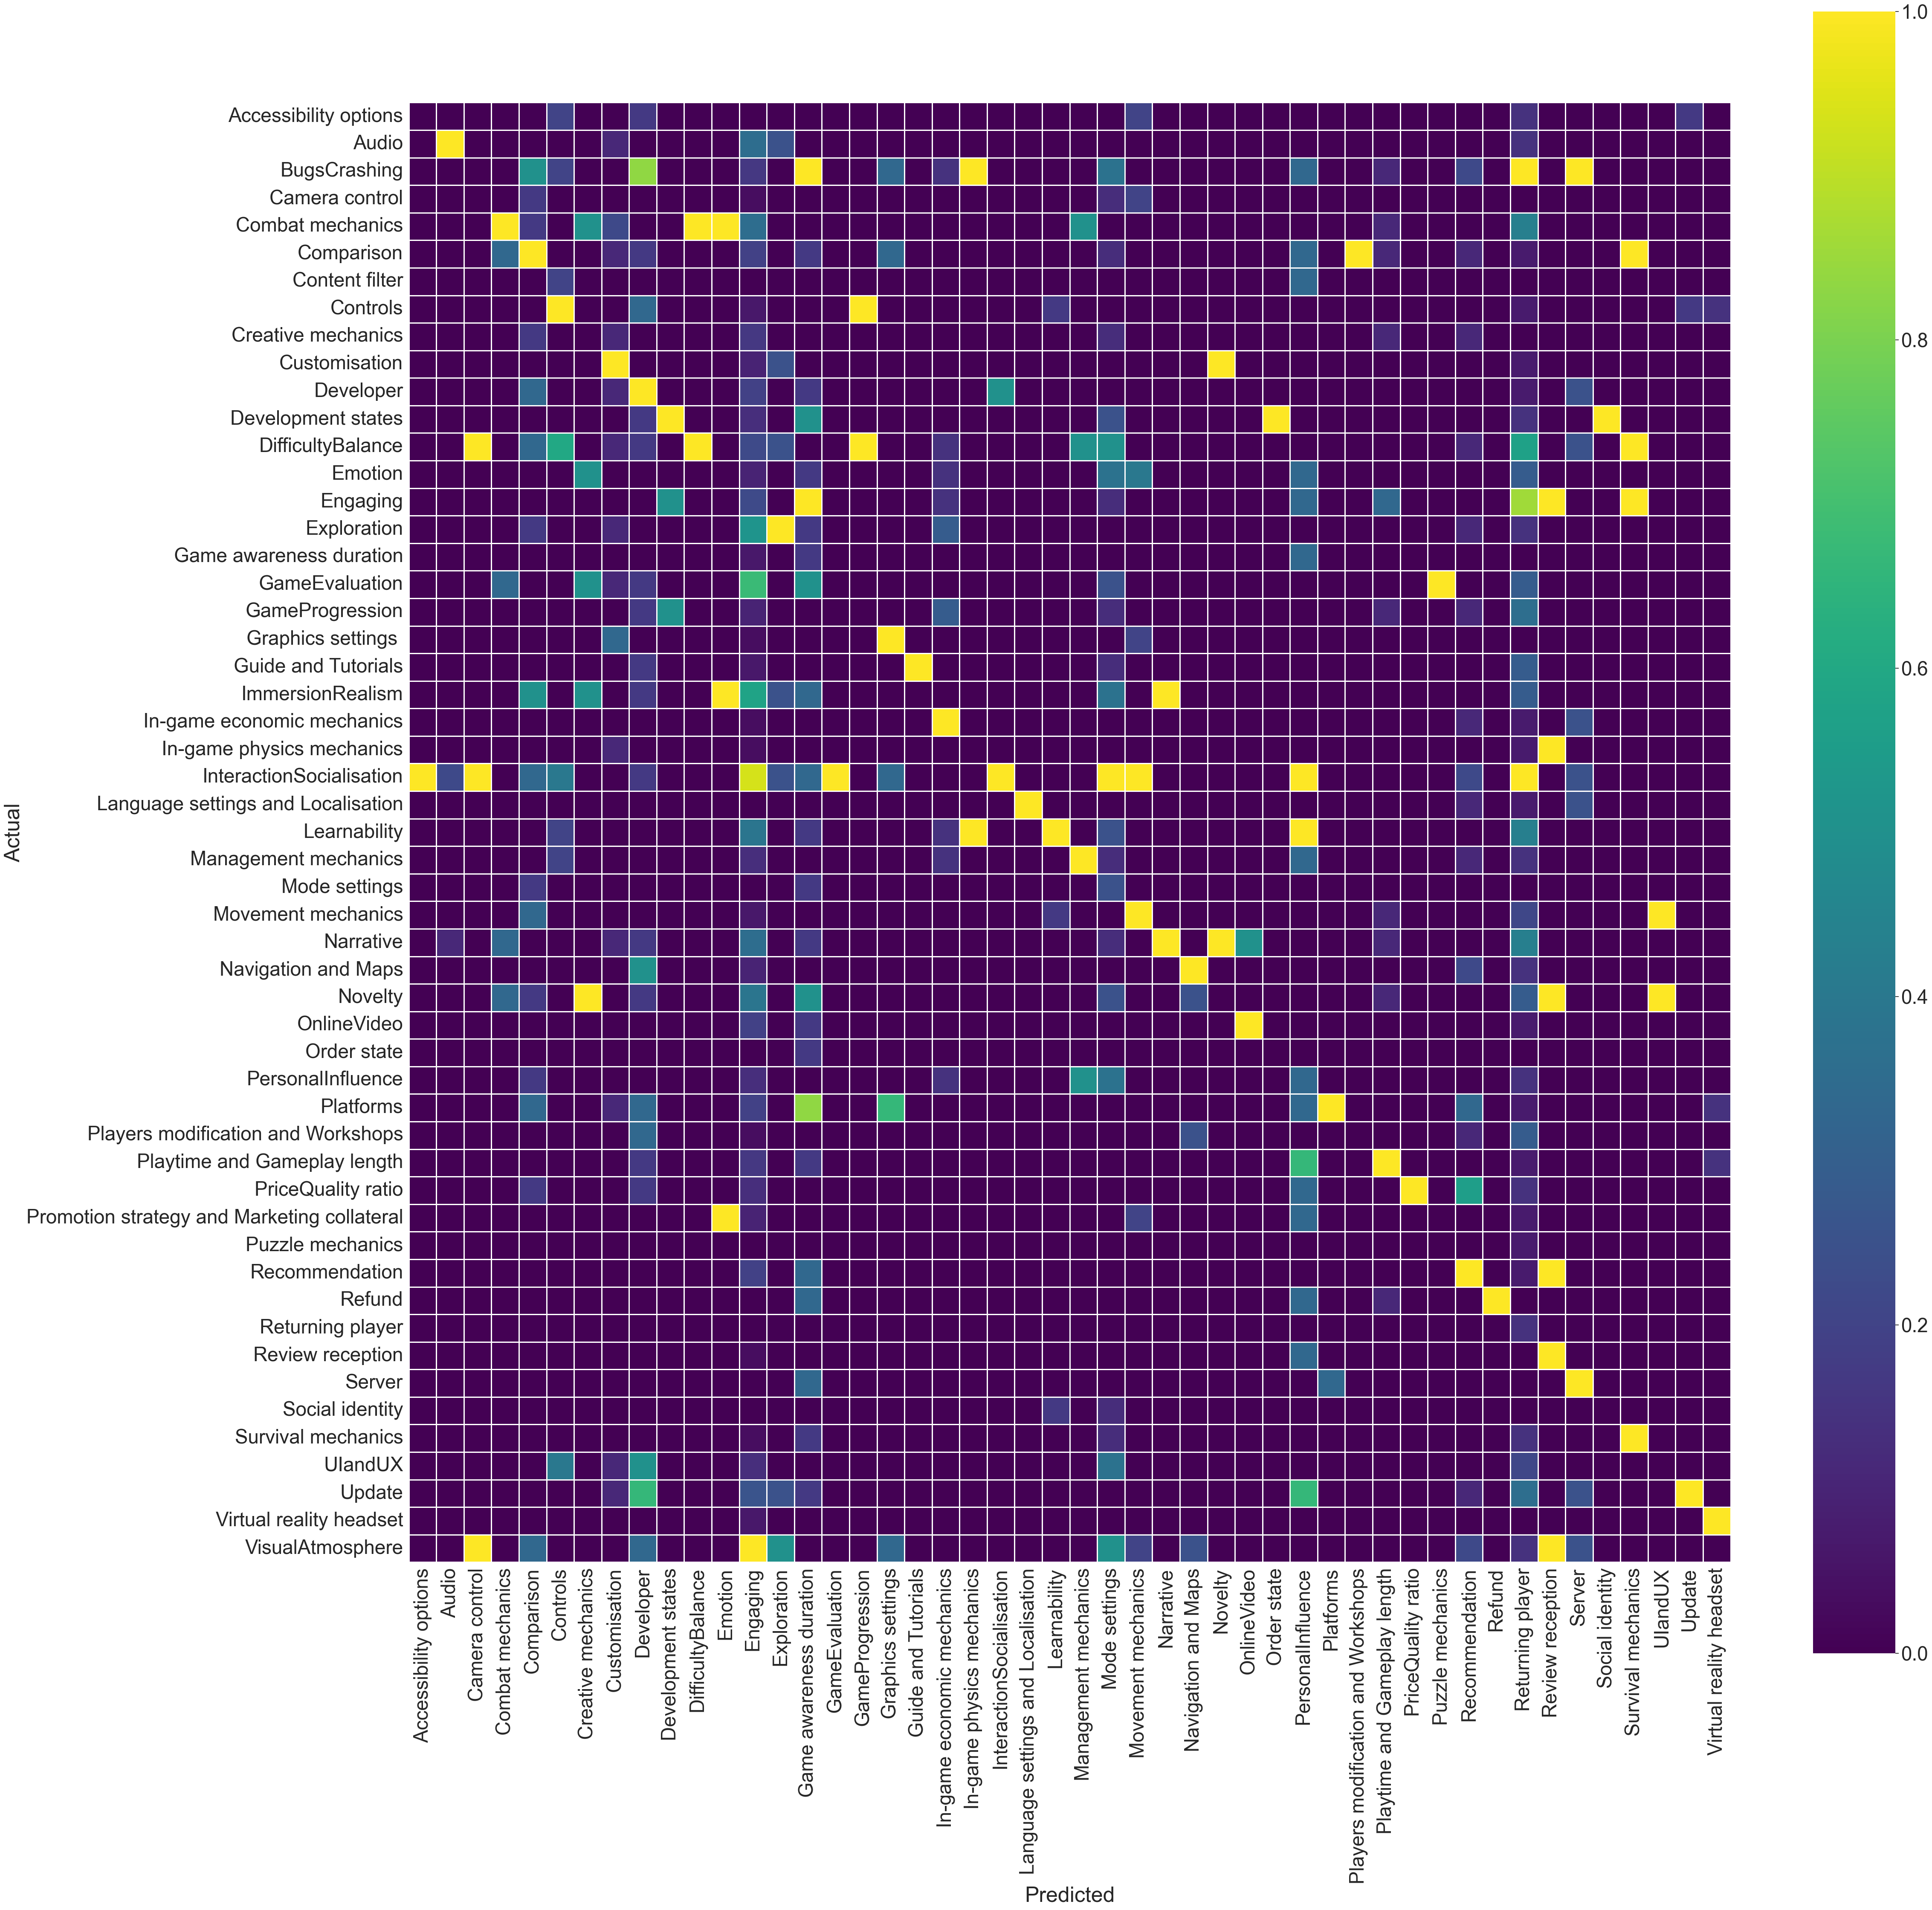

In [30]:
plt.figure(figsize = (50,50))

sn.set(font_scale=3) # for label size
sn.heatmap(df_confusion,  annot_kws={"size": 22}, cmap="viridis", fmt=".2f", square=True, linewidths=1, linecolor = "white")

plt.show()